# Introdução a Data Science

Data Science é a extração de conhecimento a partir de dados. É uma área interdisciplinar que utiliza técnicas e teorias de diversas áreas como estatística, aprendizado de máquina e ciência da computação.

## O que é um dado?

Dados são fatos brutos que descrevem o mundo físico ou virtual. Dados podem ser números, palavras, imagens, vídeos, etc. Dados podem ser estruturados ou não estruturados.

## O que é um dado estruturado?

Dados estruturados são dados que foram organizados de forma que o computador consiga entendê-los. Por exemplo, uma tabela de dados de avaliações de filmes. Neste curso iremos trabalhar com estes dados estruturados.

In [ ]:
import pandas as pd

ratings = pd.read_csv('../data/introducao-a-data-science-aula0/aula0/ml-latest-small/ratings.csv')

ratings.head()

## Analisando os dados

Vamos analisar os dados para entender melhor o que temos neles. Para isso, vamos utilizar os métodos "unique" e "value_counts" do pandas, que nos ajudam a entender quais os valores únicos de uma coluna e quantas vezes cada um aparece, respectivamente.

In [10]:
ratings.rating.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
ratings.rating.value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

## Média e mediana

A média e a mediana são medidas de tendência central. A média é a soma de todos os valores dividido pela quantidade de valores. A mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. A mediana é o valor do meio.

In [12]:
ratings.rating.mean()

3.501556983616962

In [13]:
ratings.rating.median()

3.5

Vale lembrar que a média é muito sensível a outliers, ou seja, valores muito fora do comum. Por exemplo, se tivermos 9 notas 5 e uma nota 0, a média será 4.1. Já a mediana será 5, que representa melhor o conjunto de dados.

## Visualizando os dados

O pandas possui um método chamado "plot" que nos ajuda a visualizar os dados. Vamos plotar um histograma dos dados de avaliação.

### Visualizando com Pandas

<Axes: ylabel='Frequency'>

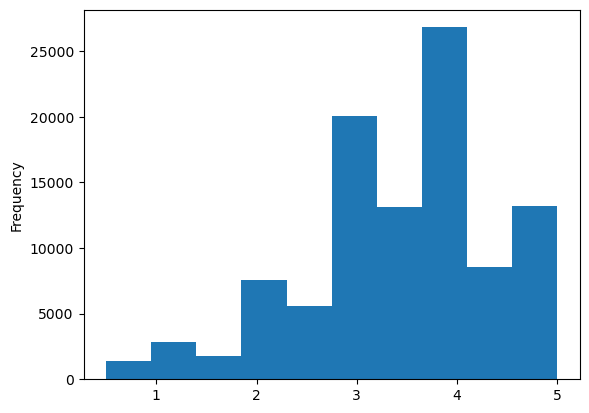

In [15]:
import matplotlib.pyplot as plt
ratings.rating.plot(kind='hist')

Outra forma de visualizar os dados é utilizando o método "boxplot". O boxplot nos mostra a mediana, os quartis e os outliers. Os outliers são os pontos fora do "intervalo normal" dos dados. Por exemplo, se tivermos 9 notas 5 e uma nota 0, o boxplot nos mostra que temos um outlier. 

### Visualizando com Seaborn

<Axes: >

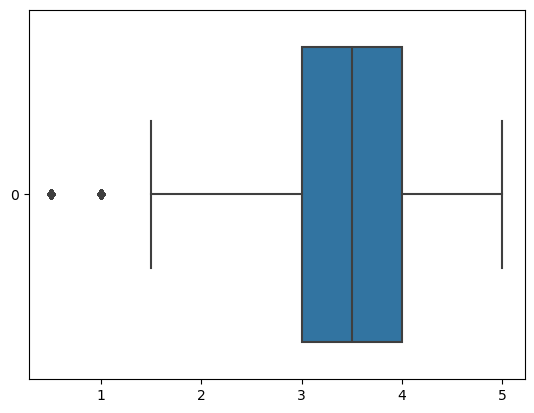

In [42]:
import seaborn as sns

sns.boxplot(ratings.rating, orient='h')

### O método describe

O método "describe" nos dá um resumo estatístico dos dados. Ele nos mostra a quantidade de dados, a média, o desvio padrão, o valor mínimo, os quartis e o valor máximo.

In [19]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

# Carregando o arquivo "movies"

In [20]:
movies = pd.read_csv('../data/introducao-a-data-science-aula0/aula0/ml-latest-small/movies.csv')

In [21]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando o filme Toy Story

Vamos analisar os dados do filme Toy Story. Para isso, vamos utilizar o método "query" do pandas para selecionar somente as linhas que possuem o título "Toy Story (1995)".

In [22]:
toy_story_ratings = ratings.query('movieId == 1')

In [23]:
toy_story_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [24]:
toy_story_ratings.rating.mean()

3.9209302325581397

## Agrupando os dados por filme

Vamos agrupar os dados por filme e calcular a média de avaliação de cada filme.

In [40]:
mean_ratings = ratings.groupby('movieId').mean().rating
mean_ratings.head()

<class 'pandas.core.series.Series'>


movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

<Axes: title={'center': 'Média dos filmes'}, ylabel='Frequency'>

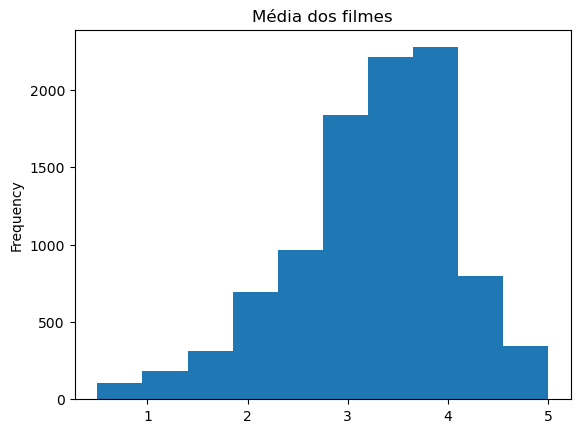

In [45]:
mean_ratings.plot(kind='hist', title='Média dos filmes')

<Axes: >

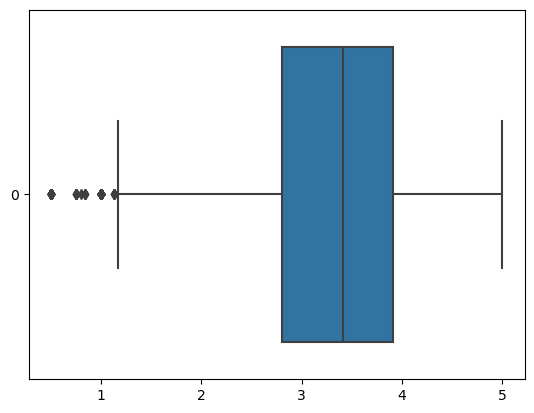

In [47]:
sns.boxplot(mean_ratings.values, orient='h')